Nama : William Yulio

NIM : 2301869840

Kelas : LD01

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
import pandas as pd
import numpy as np

In [2]:
def load_dataset():
    dataset = pd.read_csv('PlayTennis.csv')
    return dataset

In [3]:
dataset = load_dataset()
dataset

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

dataset['Outlook'] = Le.fit_transform(dataset['Outlook'])
dataset['Temperature'] = Le.fit_transform(dataset['Temperature'])
dataset['Humidity'] = Le.fit_transform(dataset['Humidity'])
dataset['Wind'] = Le.fit_transform(dataset['Wind'])
dataset['Play Tennis'] = Le.fit_transform(dataset['Play Tennis'])

In [5]:
features = dataset[['Outlook', 'Temperature', 'Humidity', 'Wind']]
label = dataset[['Play Tennis']]

In [6]:
features

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [7]:
ID3 = tree.DecisionTreeClassifier(criterion = 'entropy')
ID3 = ID3.fit(features, label)

CART = tree.DecisionTreeClassifier(criterion = "gini")
CART = CART.fit(features, label)

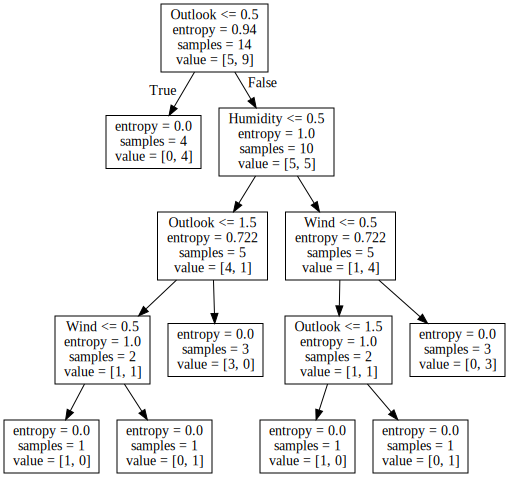

In [8]:
dot_data = tree.export_graphviz(ID3, out_file=None, 
                      feature_names=features.columns)  
graph = graphviz.Source(dot_data)  
graph 

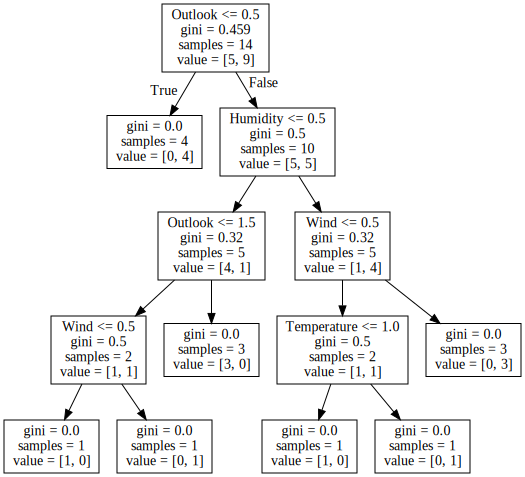

In [9]:
dot_data = tree.export_graphviz(CART, out_file=None, 
                      feature_names=features.columns)  
graph = graphviz.Source(dot_data)  
graph 

# Detail Koding

1. Pertama yang saya lakukan adalah import semua library yang akan digunakan untuk assignment kali ini. Selanjutnya adalah memasukkan dataset yang akan digunakan yaitu PlayTennis.csv.

2. Kemudian saya melakukan proses preprocessing kepada dataset agar dataset yang semula merupakan string diubah menjadi variabel angka dengan menggunakan LabelEncoder() agar dapat masuk kedalam model yang akan kita buat nantinya. Saya memilih LabelEncoder agar string bisa diubah menjadi categorized value.

3. Selanjutnya masuk kedalam pemilihan features dan label yang akan digunakan dan dilanjutkan dengan pembuatan model menggunakan library sklearn dengan mengimport DecisionTreeClassifier kedalam koding.

4. Dalam tahap membuat model, saya membuat 2 jenis model yaitu model ID3 dengan menggunakan entropy dan model CART dengan menggunakan GINI Index. Hal ini dilakukan agar bisa melihat perbandingan antara kedua model nanti.

5. Sebelumnya saya tidak menggunakan split data dikarenakan, ketika saya split dataset yang digunakan. Hasil dari model akan menjadi tidak utuh sesuai dengan dataset aslinya, oleh karena itu saya langsung memasukkan semua dataset tanpa di split datanya.

6. Kemudian saya melakukan plotting untuk melihat hasil dari decision tree menggunakan 2 jenis algortima, dan dihasilkan bentuk yang sama dari kedua algortima tersebut.

# Kesimpulan

Kedua jenis decision tree menghasilkan bentuk yang sama setelah diplotting menggunakan tree.export_graphviz(). Namun apabila kita bandingkan dengan perhitungan secara manual terdapat sebuah perbedaan dalam kedua pohon tersebut, menurut saya hal ini bisa terjadi karena model tidak dilatih terlebih dahulu menggunakan data training dan data test. 